In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
Base =automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [39]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [40]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [41]:
# Create our session (link) from Python to the DB
session = Session (engine)

# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
most_recent_data_point = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_data_point

('2017-08-23',)

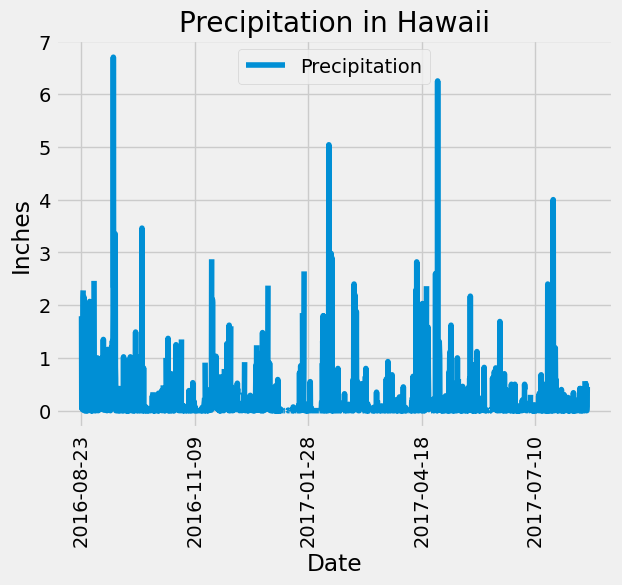

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(most_recent_data_point[0],'%Y-%m-%d').date() 

# Calculate the date one year from the last date in data set.
one_year_from = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
preci_score = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_from).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
preci_df = pd.DataFrame(preci_score, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
preci_df = preci_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
preci_df.plot(x="Date", y="Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in Hawaii")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
preci_df = pd.DataFrame(preci_score, columns=['Date', 'Precipitation'])
preci_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(measurement.station).group_by(measurement.station).count()
stations

9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_statios = session.query(measurement.station, measurement.date).all()
active_stations_df = pd.DataFrame(active_statios, columns=['Station', 'Date'])
active_stations_df = active_stations_df.groupby('Station').count().sort_values('Date', ascending=False)
active_stations_df

,Date
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations_df.index[0]
# most_active_station

# Lowest temperature
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).all()
# lowest_temp

# Highest temperature
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).all()
# highest_temp

# Avg temperature
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
# avg_temp

# Create df for most_active_station
most_active_station_df = pd.DataFrame({ 'Station': most_active_station,
                                       'Lowest Temperature': lowest_temp[0][0],
                                        'Highest Temperature': highest_temp[0][0],
                                        'Average Temperature': avg_temp[0][0]
                                      }, index=[0])
most_active_station_df


,Station,Lowest Temperature,Highest Temperature,Average Temperature
0,USC00519281,54.0,85.0,71.663781


Text(0, 0.5, 'Frequency')

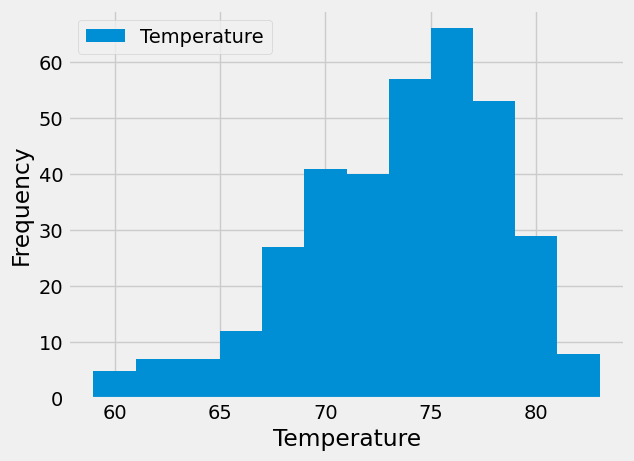

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= one_year_from).all()
one_year_data_df = pd.DataFrame(one_year_data, columns=['Temperature'])
one_year_data_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [49]:
# Close Session
session.close()